In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os 

import numpy as np
from scipy import stats
import scipy.spatial.distance as sp_distance
from sklearn.svm import NuSVC
import nibabel as nib

from brainiak.isc import isc
from brainiak.fcma.util import compute_correlation
import brainiak.funcalign.srm
from brainiak import image, io

import matplotlib.pyplot as plt

%autosave 5
%matplotlib inline

Autosaving every 5 seconds


In [2]:
import pickle 

In [3]:
# Define the paths
base_path = "/Volumes/my drive/thesis_pipeline"
srm_data_path = os.path.join(base_path, "SRM_data")

# Define ROI names
roi_names = ['PTL', 'ATL', 'AG', 'IFG', 'MFG', 'IFGorb']

In [4]:
def visualize_shared_response(roi_name):
    shared_data_file = os.path.join(srm_data_path, f"{roi_name}_shareddata.pkl")
    
    if os.path.exists(shared_data_file):
        with open(shared_data_file, 'rb') as file:
            shared_data = pickle.load(file)
        
        # Plot the shared response
        print(f'SRM: Features X Time-points for {roi_name}', shared_data[0].shape)
        plt.figure(figsize=(15, 4))
        plt.title(f'SRM: Features X Time-points for {roi_name}')
        plt.xlabel('TR')
        plt.ylabel('Feature')
        plt.imshow(shared_data[0], aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.show()
    else:
        print(f"Shared data file for {roi_name} not found.")

SRM: Features X Time-points for PTL (90, 1291)


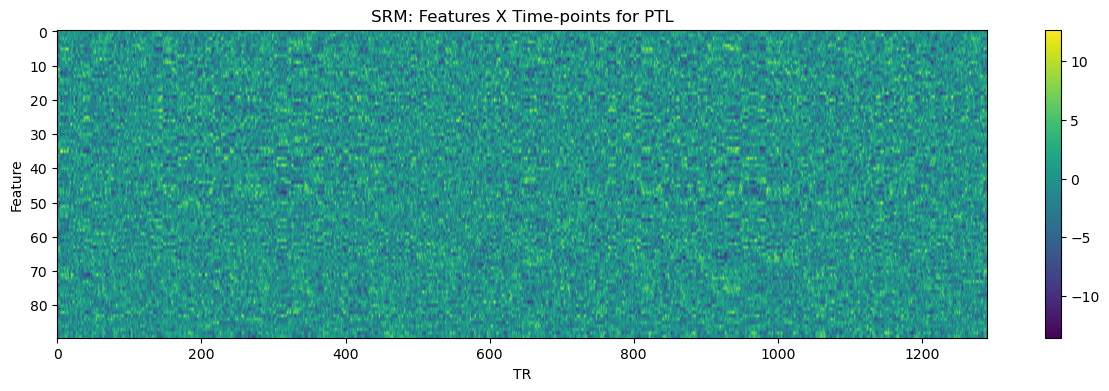

SRM: Features X Time-points for ATL (90, 1291)


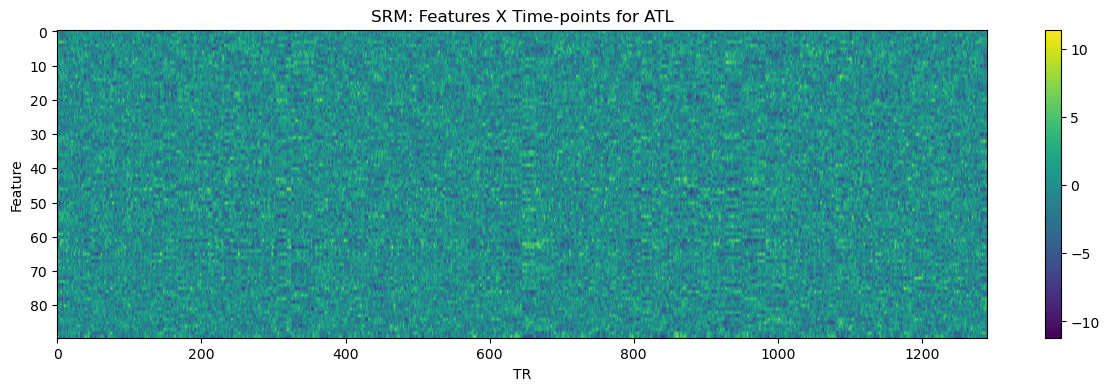

SRM: Features X Time-points for AG (90, 1291)


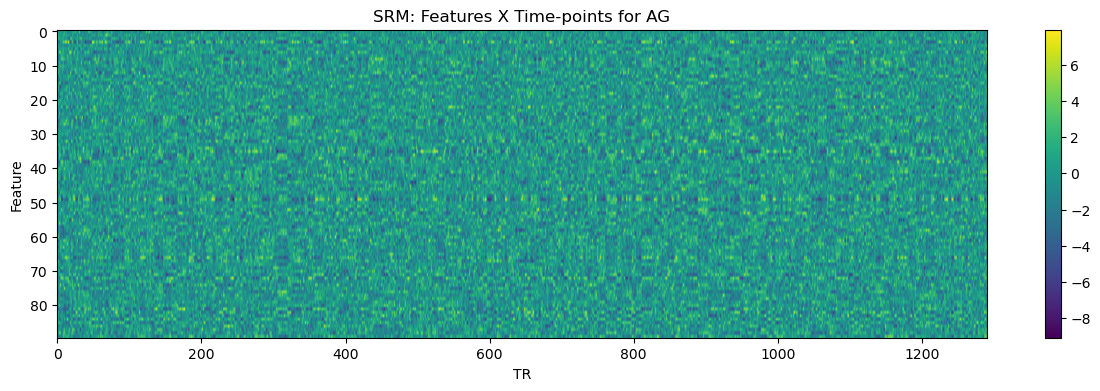

SRM: Features X Time-points for IFG (90, 1291)


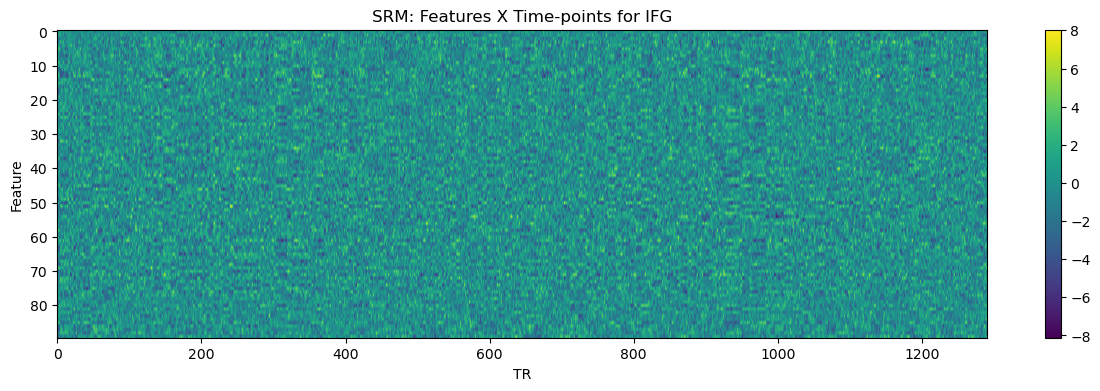

SRM: Features X Time-points for MFG (90, 1291)


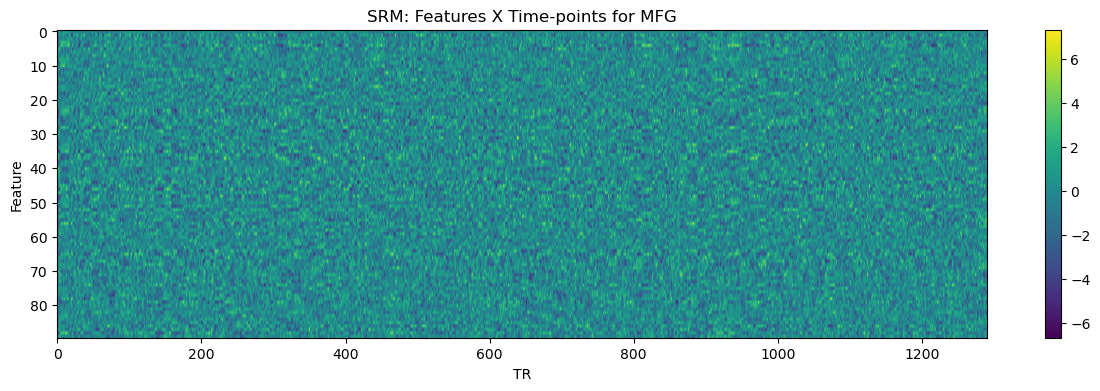

SRM: Features X Time-points for IFGorb (90, 1291)


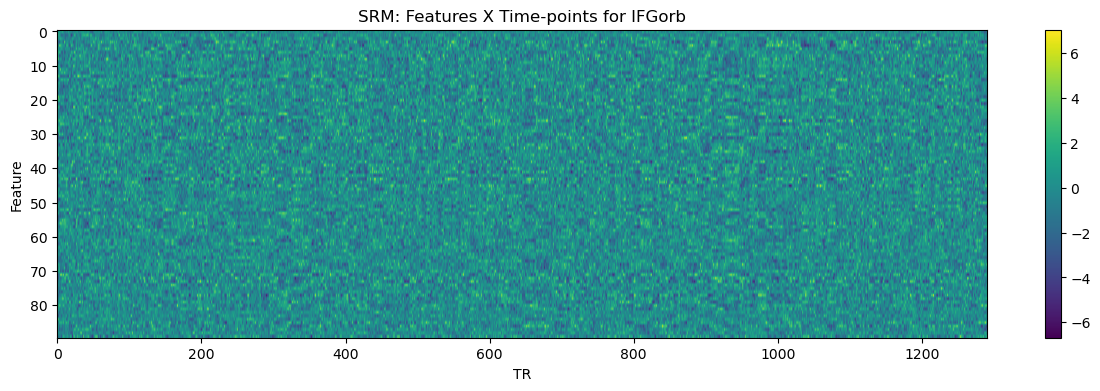

In [5]:
for roi in roi_names:
    visualize_shared_response(roi)

In [6]:
def compute_and_visualize_distance_matrix(roi_name):
    shared_data_file = os.path.join(srm_data_path, f"{roi_name}_shareddata.pkl")
    
    if os.path.exists(shared_data_file):
        with open(shared_data_file, 'rb') as file:
            shared_data = pickle.load(file)
        
        # Use the first subject's shared response for the distance matrix
        shared_response = shared_data[0]
        
        # Compute the distance matrix
        dist_mat = sp_distance.squareform(sp_distance.pdist(shared_response.T))
        
        # Plot the distance matrix
        plt.figure(figsize=(7, 5))
        plt.title(f'Distance between pairs of time points in shared space for {roi_name}')
        plt.xlabel('TR')
        plt.ylabel('TR')
        plt.imshow(dist_mat, cmap='viridis', aspect='auto')
        plt.colorbar()
        plt.show()
    else:
        print(f"Shared data file for {roi_name} not found.")

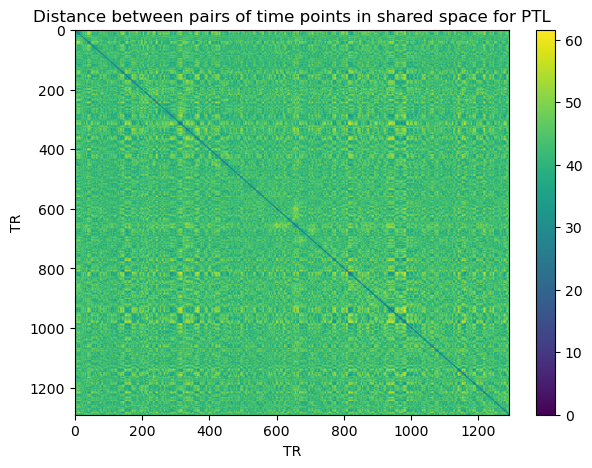

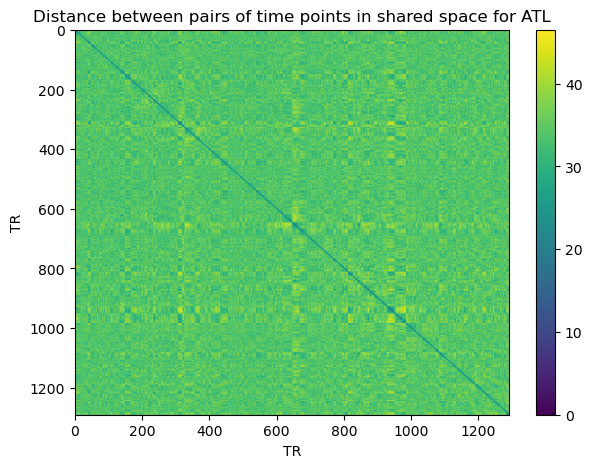

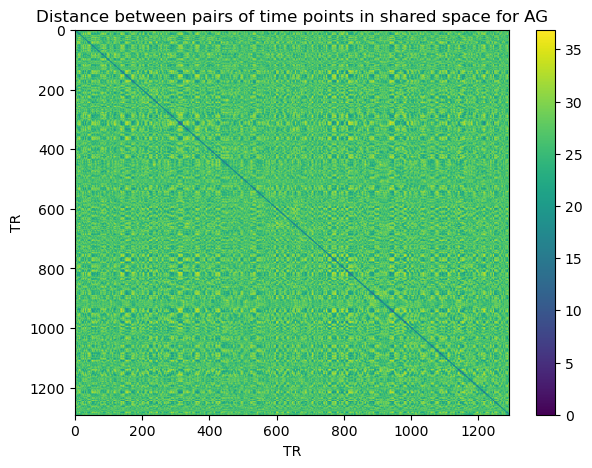

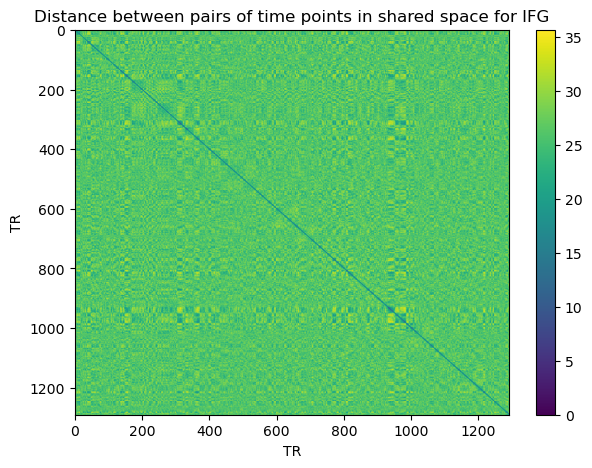

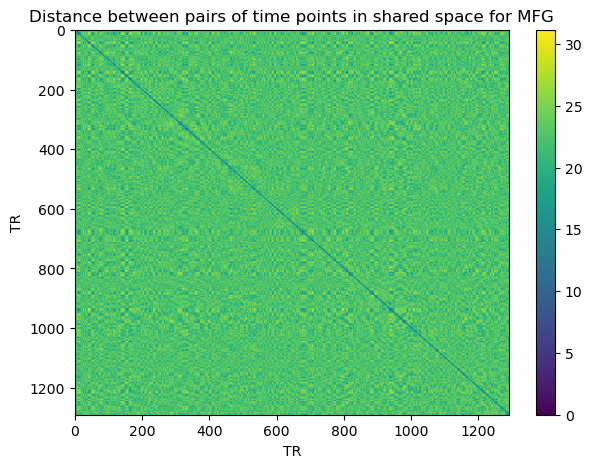

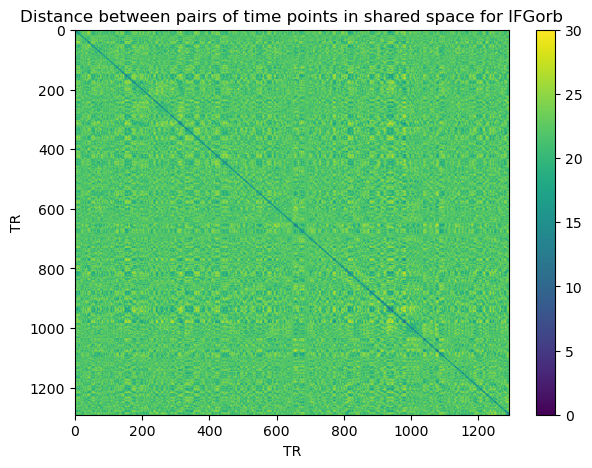

In [7]:
for roi in roi_names:
    compute_and_visualize_distance_matrix(roi)

Loading data from /Volumes/my drive/thesis_pipeline/SRM_data/ATL_shareddata.pkl
Shared response shape for ATL: (90, 1291)
Sample of shared response data for ATL:
[[ 1.39444986  2.86688252  1.2607117  -3.24105714  1.01225612]
 [ 3.30651217  3.95905467  1.59306549  0.23686095 -2.58318383]
 [ 0.65377035  1.03640312 -0.55734152  0.30493045 -1.3186093 ]
 [ 0.96892353  2.9713161   2.14895624  7.51185767  3.77224714]
 [-1.92035546  0.67485453 -2.47257656 -3.1858704  -2.6749665 ]]
Correlation matrix shape for ATL: (1291, 1291)


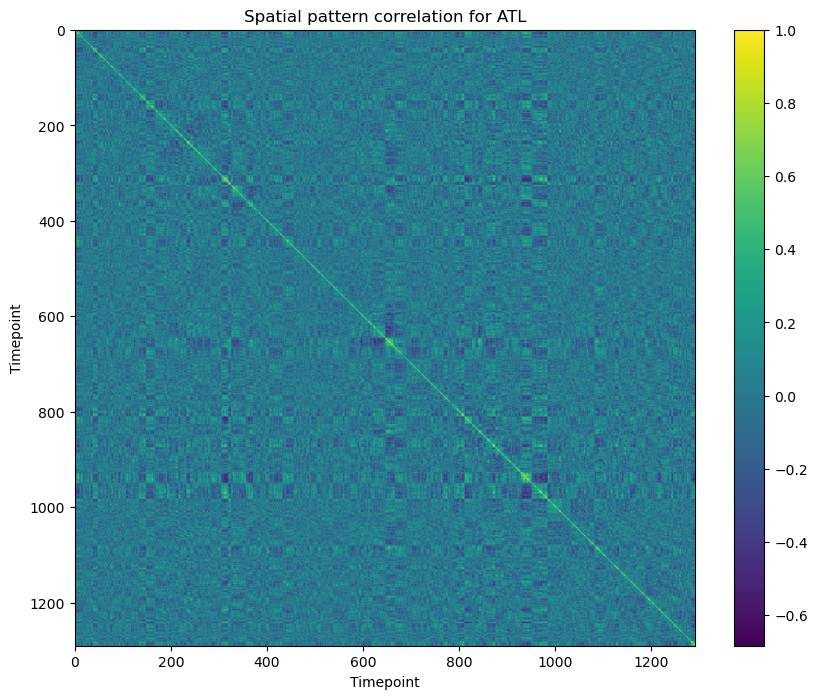

Loading data from /Volumes/my drive/thesis_pipeline/SRM_data/IFG_shareddata.pkl
Shared response shape for IFG: (90, 1291)
Sample of shared response data for IFG:
[[-0.45591394  1.07955155  0.44146243  0.94375683  2.12077116]
 [-1.51074103  1.08737038  0.70227729  2.7928708   1.68104718]
 [-2.1690767   0.51234104 -0.04309592 -4.76745362 -0.52588577]
 [-1.32585262 -2.60003415 -0.225885   -1.32273031  5.26800995]
 [-0.10663279  0.49232424  0.4956915   1.7439219  -2.54092392]]
Correlation matrix shape for IFG: (1291, 1291)


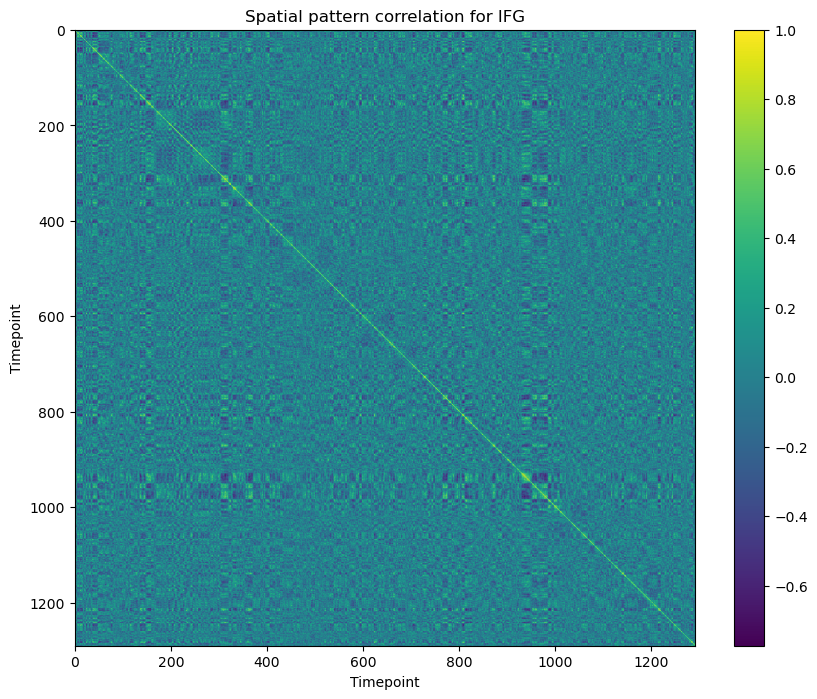

In [9]:
# Define ROI names
roi_names = ['ATL', 'IFG']

# Function to load shared response data and compute correlation matrix
def compute_and_visualize_correlation_matrix(roi_name):
    shared_data_file = os.path.join(srm_data_path, f"{roi_name}_shareddata.pkl")
    
    if os.path.exists(shared_data_file):
        print(f"Loading data from {shared_data_file}")
        
        with open(shared_data_file, 'rb') as file:
            shared_data = pickle.load(file)
        
      
        shared_response = shared_data[0]
        
        # Check the shape of the shared response matrix
        print(f"Shared response shape for {roi_name}: {shared_response.shape}")
        
        # Print a sample of the shared response data
        print(f"Sample of shared response data for {roi_name}:\n{shared_response[:5, :5]}")
        
        # Compute the correlation matrix
        corr_mat = np.corrcoef(shared_response.T)
        
        # Check the shape of the correlation matrix
        print(f"Correlation matrix shape for {roi_name}: {corr_mat.shape}")
        
        # Plot the correlation matrix
        plt.figure(figsize=(10, 8))
        plt.imshow(corr_mat, aspect='auto', cmap='viridis')
        plt.xlabel('Timepoint')
        plt.ylabel('Timepoint')
        plt.colorbar()
        plt.title(f'Spatial pattern correlation for {roi_name}')
        plt.show()
    else:
        print(f"Shared data file for {roi_name} not found.")

# Compute and visualize correlation matrix for the ATL region
compute_and_visualize_correlation_matrix('ATL')

# Optional: Check another ROI for comparison
compute_and_visualize_correlation_matrix('IFG')
